<a href="https://colab.research.google.com/github/OumGhaith/Comparative_Steel_Inspection_using_Densnet_and_k_cross_validation/blob/main/Xception_steel_surface_95_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classifying steel surface

In [ ]:
from tensorflow.keras.layers import Input,  Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras.applications.xception import Xception
from tensorflow import keras
import tensorflow

In [ ]:
IMAGE_SIZE = [224, 224]
IMG_SHAPE = []

train_path = '/content/drive/MyDrive/steel_surface_dataset/steel_images/train_dataset'
valid_path = '/content/drive/MyDrive/steel_surface_dataset/steel_images/test_dataset'

In [ ]:
xception = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in xception.layers:
  layer.trainable=False

In [ ]:
folders=glob( '/content/drive/MyDrive/steel_surface_dataset/steel_images/train_dataset/*')

In [ ]:
x=Flatten()(xception.output)



x = tensorflow.keras.layers.Dropout(0.2)(x)
prediction=Dense(len(folders),activation='softmax')(x)


model = Model(inputs=xception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/steel_surface_dataset/steel_images/train_dataset',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1440 images belonging to 6 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/steel_surface_dataset/steel_images/test_dataset',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 360 images belonging to 6 classes.


In [ ]:
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=7,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/7
45/45 [==============================] - 337s 7s/step - loss: 0.4733 - accuracy: 0.8778 - val_loss: 0.4717 - val_accuracy: 0.8806
Epoch 2/7
45/45 [==============================] - 330s 7s/step - loss: 0.0784 - accuracy: 0.9778 - val_loss: 0.2431 - val_accuracy: 0.9417
Epoch 3/7
45/45 [==============================] - 330s 7s/step - loss: 0.0656 - accuracy: 0.9840 - val_loss: 0.1413 - val_accuracy: 0.9694
Epoch 4/7
45/45 [==============================] - 329s 7s/step - loss: 0.0792 - accuracy: 0.9743 - val_loss: 0.2516 - val_accuracy: 0.9500
Epoch 5/7
45/45 [==============================] - 329s 7s/step - loss: 0.0370 - accuracy: 0.9868 - val_loss: 0.2570 - val_accuracy: 0.9639
Epoch 6/7
45/45 [==============================] - 329s 7s/step - loss: 0.0322 - accuracy: 0.9903 - val_loss: 0.3737 - val_accuracy: 0.9500
Epoch 7/7
45/45 [==============================] - 329s 7s/step - loss: 0.0451 - accuracy: 0.9889 - val_loss: 0.3764 - val_accuracy: 0.9528


In [ ]:
history.history

{'accuracy': [0.8777777552604675,
  0.9777777791023254,
  0.9840278029441833,
  0.9743055701255798,
  0.9868055582046509,
  0.9902777671813965,
  0.9888888597488403],
 'loss': [0.4733439087867737,
  0.078448086977005,
  0.06557423621416092,
  0.07923828065395355,
  0.037042632699012756,
  0.032204851508140564,
  0.04507846385240555],
 'val_accuracy': [0.8805555701255798,
  0.9416666626930237,
  0.9694444537162781,
  0.949999988079071,
  0.9638888835906982,
  0.949999988079071,
  0.9527778029441833],
 'val_loss': [0.47172117233276367,
  0.2431495189666748,
  0.14133954048156738,
  0.2515515387058258,
  0.2570326626300812,
  0.3736848533153534,
  0.37643080949783325]}

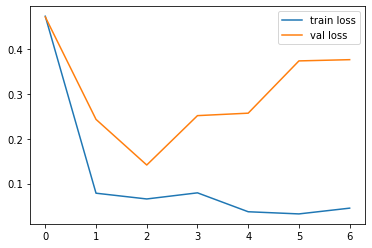

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

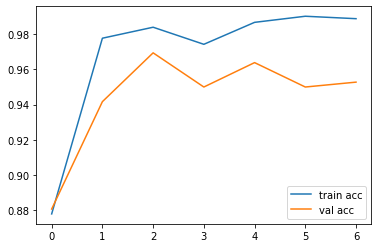

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('steel_xception_dropout.h5')

In [ ]:
y_pred=model.predict(test_set)
y_pred

array([[9.9572563e-01, 6.6583283e-08, 1.8103046e-07, 4.2414214e-03,
        3.2647633e-05, 6.3239808e-12],
       [2.1827707e-04, 7.7803662e-08, 3.3375866e-08, 6.1102264e-07,
        9.9978095e-01, 2.2080393e-15],
       [5.6119244e-26, 3.1381016e-33, 1.0000000e+00, 1.8804749e-20,
        6.5931979e-25, 1.3096006e-37],
       ...,
       [7.9205166e-18, 1.0000000e+00, 2.0494896e-14, 6.2799614e-12,
        4.3339273e-12, 3.2317695e-17],
       [2.1404278e-22, 1.0000000e+00, 2.5528498e-22, 4.6267300e-12,
        2.4784968e-18, 2.9787568e-13],
       [4.3671990e-21, 4.3939859e-36, 1.0000000e+00, 7.1182250e-29,
        3.3015520e-31, 0.0000000e+00]], dtype=float32)

In [ ]:
# evaluating the model based on testing data
score = model.evaluate(test_set, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.37643080949783325
Test accuracy: 0.9527778029441833


In [ ]:
for layer in xception.layers:
  layer.trainable=True

In [ ]:
base_model = keras.applications.Xception(
    weights='imagenet',
    input_shape=(150, 150, 3),
    include_top=False)

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(1e-5),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=keras.metrics.BinaryAccuracy())

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

%load_ext tensorboard
log_folder = 'logs'
callbacks = [
            EarlyStopping(patience = 5),
            TensorBoard(log_dir=log_folder)
            ]

In [ ]:
model.fit(training_set, epochs=15, validation_data=test_set, callbacks=callbacks)


NameError: ignored